# Aireline Passenger Satisfaction

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve, precision_score,f1_score

In [2]:
train = pd.read_csv('Airline_Satisfaction/training.csv')
test = pd.read_csv('Airline_Satisfaction/test.csv')

In [3]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room,Baggage handling,Checkin service,In-flight service,Cleanliness,Departure Delay,Arrival Delay in Minutes,satisfaction,participant_id
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4,3,...,4,3.0,4,4,5,5,25,18.0,neutral or dissatisfied,84012
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2,3,...,1,5.0,3,1,4,1,1,6.0,neutral or dissatisfied,52620
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,NaN,2,2,...,4,3.0,4,4,4,5,0,0.0,satisfied,93655
3,24026,Female,Loyal Customer,25,Business travel,NaN,562,2.0,5,5,...,2,5.0,3,1,4,2,11,9.0,neutral or dissatisfied,48312
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3,3,...,3,NaN,4,3,3,3,0,0.0,satisfied,24065


In [4]:
print(f"train data shape is {train.shape} and test data shape is {test.shape}")

train data shape is (103904, 25) and test data shape is (25976, 25)


## Exploratory Data Analysis

### Although train and test data shape appear to have the same shape, they contain different features which needs to be unified at some point in the code

In [5]:
# The info of the training dataset showing data types and counts of non null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                93514 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                93496 non-null float64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online                               103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64


In [6]:
## Train data description containing the statistics of different features in the training dataset
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online,Seat comfort,Inflight entertainment,Leg room,Checkin service,In-flight service,Cleanliness,Departure Delay,Arrival Delay in Minutes,participant_id
count,103904.000000,103904.000000,103904.000000,93496.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,93592.000000,103904.000000,103904.000000,103904.000000,103904.000000,93174.000000,103904.000000
mean,64924.210502,39.379706,1234.092287,2.729892,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.349261,3.304290,3.640428,3.286351,14.815618,15.109065,62172.765197
std,37463.812252,15.114964,1458.180425,1.327526,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.316305,1.265396,1.175663,1.312273,38.230901,38.539457,35773.637042
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0.000000,31201.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,62166.500000
75%,97368.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,12.000000,13.000000,93210.500000
max,129880.000000,85.000000,39400.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,123973.000000


In [7]:
# The info of the testing dataset showing data types and counts of non null values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
Unnamed: 0                           25976 non-null int64
id                                   25976 non-null int64
Gender                               25976 non-null object
Customer Type                        25976 non-null object
Age                                  25976 non-null int64
Type of Travel                       24912 non-null object
Class                                25976 non-null object
Flight Distance                      25976 non-null int64
Inflight wifi service                25976 non-null int64
Departure/Arrival time convenient    25976 non-null int64
Ease of Online booking               25976 non-null int64
Gate location                        25976 non-null int64
Food and drink                       25976 non-null int64
Online boarding                      25976 non-null int64
Seat comfort                         25976 non-null int64
Inflight entertai

### Making the names consistent in train and test data

In [8]:
train = train.rename({'In-flight service':'Inflight service','Online':'Online boarding',\
                    'Leg room':'Leg room service'},axis=1)
test = test.rename({'Departure Delay in Minutes':'Departure Delay'},axis=1)


In [9]:
train.Gender.value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [10]:
# The customer type data has some data quality issues which needs to be addressed 
train['Customer Type'].value_counts()

Loyal Customer       84766
disloyal Customer    18981
Loyal, Customer        157
Name: Customer Type, dtype: int64

In [11]:
## addressing the data quality issues of the customer type data
train['Customer Type'] = train['Customer Type'].map({'Loyal, Customer':'Loyal Customer',\
                                                     'Loyal Customer':'Loyal Customer',\
                                                'disloyal Customer':'disloyal Customer'})
test['Customer Type'] = test['Customer Type'].map({'Loyal, Customer':'Loyal Customer',\
                                                     'Loyal Customer':'Loyal Customer',\
                                                'disloyal Customer':'disloyal Customer'})

In [12]:
train['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [13]:
## The type of travel field has some data quality issues that needs to be addressed.
train['Type of Travel'].value_counts()

Business travel       71505
Personal Travel       32249
Business Travel         135
Business \n Travel       15
Name: Type of Travel, dtype: int64

In [14]:
## addressing the data quality issues of the type of travel fields
train['Type of Travel'] = train['Type of Travel'].apply(lambda x: 'Personal Travel' if x == 'Personal Travel' else 'Business Travel')
test['Type of Travel'] = test['Type of Travel'].apply(lambda x: 'Personal Travel' if x == 'Personal Travel' else 'Business Travel')

In [15]:
train['Type of Travel'].value_counts()

Business Travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [16]:
train.Class.value_counts()

Business    44649
Eco         42109
Eco Plus     6756
Name: Class, dtype: int64

In [17]:
## The train and test data have different values for the satisfaction field. Unifing them in the next step
train.satisfaction.value_counts()

neutral or dissatisfied    58876
satisfied                  45025
dissatisfied                   3
Name: satisfaction, dtype: int64

In [18]:
test.satisfaction.value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

In [19]:
train['satisfaction']=train.satisfaction.map({'neutral or dissatisfied':0,'satisfied':1,'dissatisfied':0})
test['satisfaction']=test.satisfaction.map({'neutral or dissatisfied':0,'satisfied':1,'dissatisfied':0})

In [20]:
train['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [21]:
test['satisfaction'].value_counts()

0    14573
1    11403
Name: satisfaction, dtype: int64

### Plotting some histograms for different fields

Text(0.5, 1.0, 'Histogram of Food and drink')

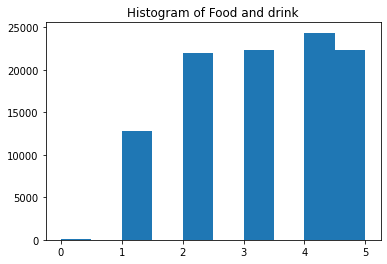

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(train['Food and drink'], bins = 10)
plt.title('Histogram of Food and drink') 

Text(0.5, 1.0, 'Histogram of Age')

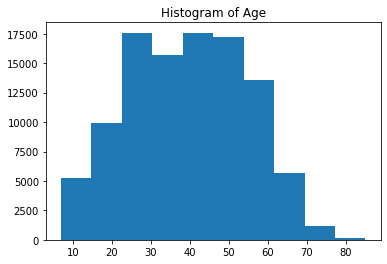

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(train['Age'], bins = 10)
plt.title('Histogram of Age') 
#train['Age'].hist()

Text(0.5, 1.0, 'Histogram of Flight Distance')

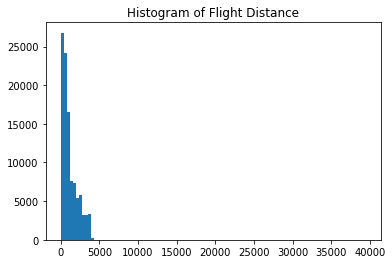

In [24]:
plt.hist(train['Flight Distance'], bins = 100)
plt.title('Histogram of Flight Distance')

### Checking the impact of some features on satisfaction

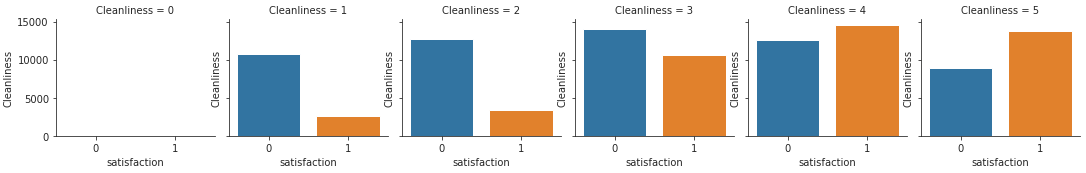

In [25]:
# Cleanliness
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)
    g.set(xlabel='satisfaction', ylabel='Cleanliness')

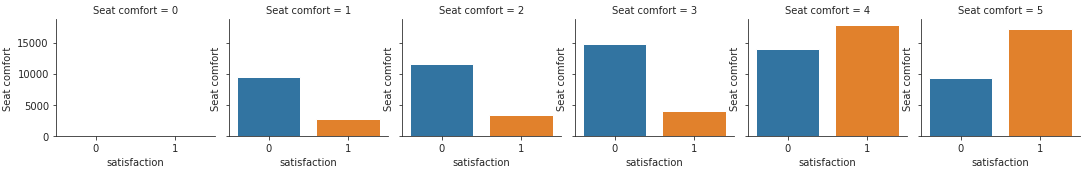

In [26]:
# Seat comfort
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)
    g.set(xlabel='satisfaction', ylabel='Seat comfort')

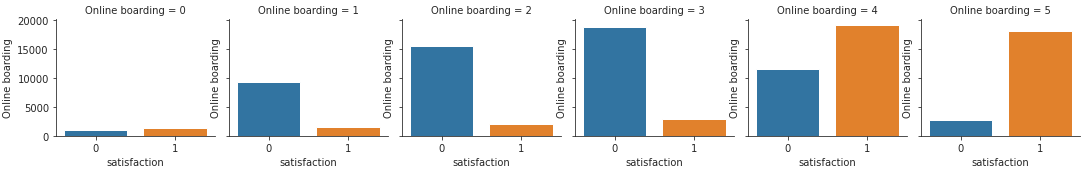

In [27]:
# Online boarding
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Online boarding", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0)
    g.set(xlabel='satisfaction', ylabel='Online boarding')


In [28]:
train.corr()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Leg room service,Checkin service,Inflight service,Cleanliness,Departure Delay,Arrival Delay in Minutes,satisfaction,participant_id
id,1.000000,0.022857,0.071496,-0.021741,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.045896,0.079273,0.079346,0.024965,-0.019546,-0.037545,0.013734,-0.000876
Age,0.022857,1.000000,0.073984,0.017499,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.039268,0.035482,-0.049427,0.053611,-0.010152,-0.010873,0.137167,0.000425
Flight Distance,0.071496,0.073984,1.000000,0.003319,-0.014301,0.050086,0.002632,0.041174,0.152519,0.110447,0.090478,0.098329,0.053092,0.041491,0.062030,0.001473,-0.001699,0.214843,-0.000985
Inflight wifi service,-0.021741,0.017499,0.003319,1.000000,0.342443,0.714960,0.337005,0.133893,0.455169,0.122824,0.207609,0.159518,0.044928,0.109331,0.132112,-0.017251,-0.020016,0.283587,0.002560
Departure/Arrival time convenient,-0.002110,0.038125,-0.014301,0.342443,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.014718,0.093333,0.073318,0.014292,0.001005,-0.000492,-0.051601,-0.003555
Ease of Online booking,0.014163,0.024842,0.050086,0.714960,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.107482,0.011081,0.035272,0.016179,-0.006371,-0.009574,0.171705,0.000997
Gate location,-0.000606,-0.001330,0.002632,0.337005,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.006235,-0.035427,0.001681,-0.003830,0.005467,0.004810,0.000682,0.000466
Food and drink,0.001063,0.023000,0.041174,0.133893,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.032499,0.087299,0.033993,0.657760,-0.029926,-0.032439,0.209936,0.002345
Online boarding,0.055477,0.208939,0.152519,0.455169,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.122915,0.204462,0.074573,0.331517,-0.018982,-0.020267,0.503557,0.000346
Seat comfort,0.052903,0.160277,0.110447,0.122824,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.106391,0.191854,0.069218,0.678534,-0.027898,-0.028546,0.349459,-0.000733


In [29]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Miles Program,Inflight service,Cleanliness,Departure Delay,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business Travel,Eco,160,5,4,...,5,5,5.0,5,2,5,5,50,44.0,1
1,1,90035,Female,Loyal Customer,36,Business Travel,Business,2863,1,1,...,4,4,4.0,4,3,4,5,0,0.0,1
2,2,12360,Male,disloyal Customer,20,Business Travel,Eco,192,2,0,...,2,4,1.0,3,2,2,2,0,0.0,0
3,3,77959,Male,Loyal Customer,44,Business Travel,Business,3377,0,0,...,1,1,1.0,1,3,1,4,0,6.0,1
4,4,36875,Female,Loyal Customer,49,Business Travel,Eco,1182,2,3,...,2,2,2.0,2,4,2,4,0,20.0,1


In [30]:
# dropping the unnecessary fields for the study
train.drop(['id','participant_id'],axis=1, inplace = True)
test.drop(['id','Unnamed: 0'],axis=1, inplace = True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                93514 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                93496 non-null float64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64
On-board service                     103904 non-null object

In [32]:
# scaling the features as they happen to have a different scale which may impact the convergence rate of gradient descent
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

# get numeric data
num_d = train.select_dtypes(exclude=['object'])

# update the cols with their normalized values
train[num_d.columns] = sc.fit_transform(num_d)

# get numeric data
num_d = test.select_dtypes(exclude=['object'])

# update the cols with their normalized values
test[num_d.columns] = sc.fit_transform(num_d)

In [33]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,0.076923,Personal Travel,Eco Plus,0.010897,0.6,0.8,0.6,0.2,...,1.0,4,0.6,4,0.8,1.0,1.0,0.015704,0.011364,0.0
1,Male,disloyal Customer,0.230769,Business Travel,Business,0.005182,0.6,0.4,0.6,0.6,...,0.2,1,1.0,3,0.2,0.8,0.2,0.000628,0.003788,0.0
2,Female,Loyal Customer,0.243590,Business Travel,Business,0.028220,NaN,0.4,0.4,0.4,...,1.0,4,0.6,4,0.8,0.8,1.0,0.000000,0.000000,1.0
3,Female,Loyal Customer,0.230769,Business Travel,NaN,0.013488,0.4,1.0,1.0,1.0,...,0.4,2,1.0,3,0.2,0.8,0.4,0.006910,0.005682,0.0
4,Male,Loyal Customer,0.692308,Business Travel,Business,0.004648,0.6,0.6,0.6,0.6,...,0.6,3,NaN,4,0.6,0.6,0.6,0.000000,0.000000,1.0


## Imputing the missing values

In [34]:
round(train.isnull().sum() / len(train) *100,2)

Gender                                0.00
Customer Type                         0.00
Age                                   0.00
Type of Travel                        0.00
Class                                10.00
Flight Distance                       0.00
Inflight wifi service                10.02
Departure/Arrival time convenient     0.00
Ease of Online booking                0.00
Gate location                         0.00
Food and drink                        0.00
Online boarding                       0.00
Seat comfort                          0.00
Inflight entertainment                0.00
On-board service                      0.00
Leg room service                      9.92
Baggage handling                      0.00
Checkin service                       0.00
Inflight service                      0.00
Cleanliness                           0.00
Departure Delay                       0.00
Arrival Delay in Minutes             10.33
satisfaction                          0.00
dtype: floa

In [35]:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].mean())
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].mean())

In [36]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer Type'] = train['Customer Type'].fillna(train['Customer Type'].mode()[0])
train['Type of Travel'] = train['Type of Travel'].fillna(train['Type of Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])
train['Inflight wifi service'] = train['Inflight wifi service'].fillna(train['Inflight wifi service'].mode()[0])
train['Leg room service'] = train['Leg room service'].fillna(train['Leg room service'].mode()[0])

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer Type'] = test['Customer Type'].fillna(test['Customer Type'].mode()[0])
test['Type of Travel'] = test['Type of Travel'].fillna(test['Type of Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])
test['Inflight wifi service'] = test['Inflight wifi service'].fillna(test['Inflight wifi service'].mode()[0])
test['Leg room service'] = test['Leg room service'].fillna(test['Leg room service'].mode()[0])

In [37]:
round(train.isnull().sum() / len(train) *100,2)

Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay                      0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

### Dropping the values that are not consistent in train and test data

In [38]:
train.drop(['Checkin service'],axis=1, inplace=True)
test.drop(['Miles Program'],axis=1, inplace=True)

#### Checking if train and test data have the same fields

In [39]:
pd.Series(train.columns).sort_values().reset_index(drop=True)\
== pd.Series(test.columns).sort_values().reset_index(drop=True)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
dtype: bool

## one hot encoding and aligning the train and test data to have the same fields

In [40]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
print(train.shape,test.shape)

(103904, 38) (25976, 27)


In [41]:
train,test = train.align(test, join='outer', axis=1, fill_value=0)

In [42]:
print(train.shape,test.shape)

(103904, 40) (25976, 40)


In [43]:
## creating the train and test X and y (label)
y_train = train.satisfaction 
X_train = train.drop('satisfaction',axis=1)
y_test = test.satisfaction 
X_test = test.drop('satisfaction',axis=1)

In [44]:
X_train.head()

,Age,Arrival Delay in Minutes,Baggage handling,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Baggage handling_NONE,Class_Business,...,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,On-board service_NONE,Online boarding,Seat comfort,Type of Travel_Business Travel,Type of Travel_Personal Travel
0,0.076923,0.011364,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0.6,1.0,0,1
1,0.230769,0.003788,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0.6,0.2,1,0
2,0.243590,0.000000,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1.0,1.0,1,0
3,0.230769,0.005682,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0.4,0.4,1,0
4,0.692308,0.000000,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1.0,1.0,1,0


## Training a logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

### Accuracy on train and test data

In [47]:
from sklearn.metrics import accuracy_score
print('Train accuracy:',accuracy_score(y_train, y_pred_train))
print('Test accuracy:',accuracy_score(y_test, y_pred_test))

Train accuracy: 0.8780123960578996
Test accuracy: 0.8434323991376655


### Precision and Recall on test data

In [48]:
from sklearn.metrics import recall_score, roc_auc_score
print("recall score for logistic regression is: ",recall_score(y_test, y_pred_test, average='macro'))
print("precision score for logistic regression is: ",precision_score(y_test, y_pred_test, average='macro'))
print("f1 score for logistic regression is: ", f1_score(y_test, y_pred_test, average='macro'))
print("ROC is: ", roc_auc_score(y_test, y_pred_test))

recall score for logistic regression is:  0.8439411639420511
precision score for logistic regression is:  0.8407669763304938
f1 score for logistic regression is:  0.8418883143121016
ROC is:  0.8439411639420511


In [49]:
roc_auc = roc_auc_score(y_test, y_pred_test) 
print("ROC value for logistic regression is :", roc_auc)

ROC value for logistic regression is : 0.8439411639420511


In [50]:
## Saving the feature improrance to be using it later.
importance = clf.coef_

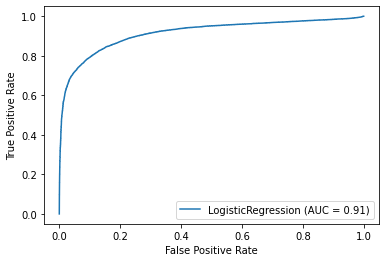

In [51]:
## plotting the ROC curve for logistic regression on test data
plot_roc_curve(clf, X_test, y_test) 

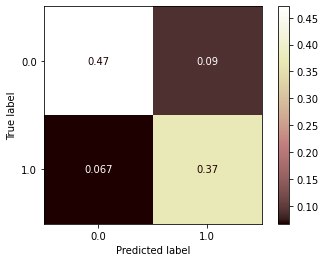

In [52]:
## plotting the confusion matrix for logistic regression
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')

### As can be seen in results, arrival delay,  personal travel, disloyal customer, and baggage handling have negative correlation with satisfaction and online boarding, wifi service, leg room service, and cleanliness have a positive correlation with the output which is satisfaction from flight

In [53]:
pd.set_option('display.min_rows', 10)
serie = pd.Series(index = X_train.columns,data= importance[0])
serie = serie.sort_values()
print(serie)

Arrival Delay in Minutes            -4.698033
Type of Travel_Personal Travel      -2.239996
Departure Delay                     -1.869507
Customer Type_disloyal Customer     -1.829876
Baggage handling_3                  -1.134006
On-board service_0                  -1.055345
Gender_Female                       -0.821669
Class_Eco Plus                      -0.807365
Gender_Male                         -0.760386
On-board service_1                  -0.712235
Class_Eco                           -0.688889
Age                                 -0.675920
Ease of Online booking              -0.613593
Departure/Arrival time convenient   -0.590819
On-board service_2                  -0.589642
Baggage handling_2                  -0.364032
Baggage handling_4                  -0.266432
Baggage handling_NONE               -0.210627
On-board service_3                  -0.137415
Food and drink                      -0.113272
Class_Business                      -0.085801
Inflight entertainment            

### features that have a high positive impact

<AxesSubplot:>

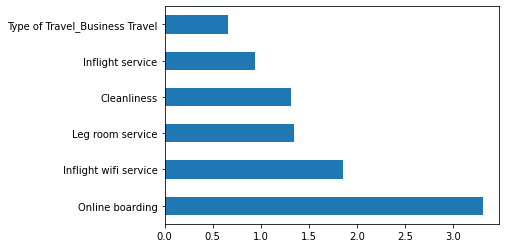

In [54]:
(pd.Series(clf.coef_[0], index=X_train.columns)
   .nlargest(6)
   .plot(kind='barh')) 

### features that have a high negative impact

<AxesSubplot:>

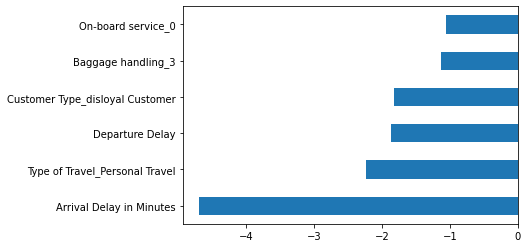

In [55]:
(pd.Series(clf.coef_[0], index=X_train.columns)
   .nsmallest(6)
   .plot(kind='barh')) 

## Training a random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 500, max_depth=12, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

### Accuracy on train and test data

In [57]:
from sklearn.metrics import accuracy_score
print('Train accuracy:',accuracy_score(y_train, y_pred_train))
print('Test accuracy:',accuracy_score(y_test, y_pred_test))

Train accuracy: 0.9520133969818294
Test accuracy: 0.9399830612873422


### Precision and Recall on test data

In [58]:
from sklearn.metrics import recall_score
print("Recall for random forest is: ", recall_score(y_test, y_pred_test, average='macro'))
print("precision score for random forest is: ",precision_score(y_test, y_pred_test, average='macro'))
print("f1 score for random forest is: ", f1_score(y_test, y_pred_test, average='macro'))
print("ROC is: ", roc_auc_score(y_test, y_pred_test))

Recall for random forest is:  0.9386417504933431
precision score for random forest is:  0.9394264625199953
f1 score for random forest is:  0.9390220469027623
ROC is:  0.9386417504933431


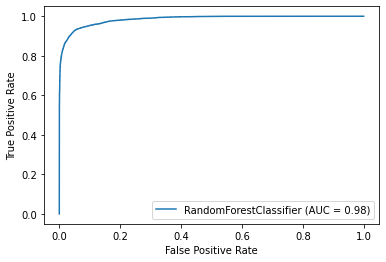

In [59]:
## plotting the ROC curve for random forrest
plot_roc_curve(clf, X_test, y_test) 

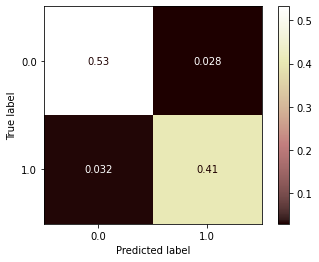

In [60]:
## Plotting the ROC curve for random forrest
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')

### Shap values for the random forest model (They are not as accurate since I had computation power limit and had to limit the train data)

In [61]:
import shap

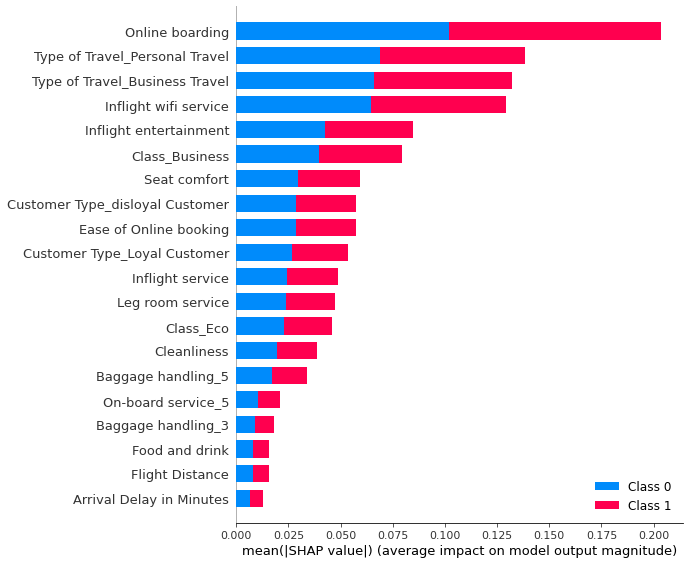

In [62]:
shap_values = shap.TreeExplainer(clf).shap_values(X_train.head(1000))
shap.summary_plot(shap_values, X_train.head(10000), plot_type="bar")

### Alternatively, a neural network can be used as a classifier to detect satisfaction level.

In [63]:
## Defing the structure of the neural network and some methods that can be useful in prediction and predicting 
## different classes in the neural network
## I decided to use some convolutional layers and some dense layer with dropout to avoid overfitting.
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, Embedding
from tensorflow.keras.layers import Flatten, Input, AlphaDropout, GlobalMaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
 
class cnn_model(object):
    def __init__(self,
                 input_size,
                 X_train = None,
                 optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 num_classes = 2, embedding_size = 128):

        self.input_size = input_size
        self.max_index = 65535
        #self.embedding_size = embedding_size
        self.optimizer = optimizer
        self.loss = loss
        self.metrics = ["accuracy"]
        self.num_classes = num_classes
        self.X_train = X_train
        self._build_model()  

    def _build_model(self):
        model = Sequential()
        n_timesteps, n_features, n_outputs = self.X_train.shape[1], self.X_train.shape[2], self.num_classes
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
        model.add(Dropout(0.2))
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
        model.add(Dropout(0.2))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(100, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(100, activation='relu'))
        model.add(Dense(n_outputs, activation='sigmoid'))
        #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
        self.model = model
        print(self.model.summary())

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size, checkpoint_every = None):
        self.model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs, batch_size = batch_size)

    def get_model(self):
        return self.model

    def test(self, X_test, y_test, batch_size):
        self.model.evaluate(X_test, y_test, batch_size = batch_size)

    def predict(self, X_test, batch_size):
        return self.model.predict(X_test, batch_size)
    
    def predict_classes(self, X_test, batch_size):
        return (self.predict(X_test, batch_size) > 0.75).astype("int32")

    def save_model(self, path):
        self.model.save(path)

In [64]:
import numpy as np
loaded = list()
loaded.append(X_train)

X_train_nn = np.dstack(loaded)
loaded = list()
loaded.append(X_test)
X_test_nn = np.dstack(loaded)
print(f"Shape of train data {X_train_nn.shape}, and test data {X_test_nn.shape}")

Shape of train data (103904, 39, 1), and test data (25976, 39, 1)


In [65]:
## instantiating a neural network model and getting its summary
## Changing the type of the labels to be categorical
## Training the model on the train and test datasets that we adapted to work with tensorflow

from tensorflow.keras.utils import to_categorical
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

model = cnn_model(input_size = (39), X_train = X_train_nn)

model.train(X_train_nn, y_train_nn, X_test_nn, y_test_nn, epochs = 10, batch_size = 300)

m = model.get_model()

m.save("model")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 37, 64)            256       
                                                                 
 dropout (Dropout)           (None, 37, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 35, 64)            12352     
                                                                 
 dropout_1 (Dropout)         (None, 35, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 17, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1088)              0         
                                                        

In [66]:
model.predict(X_test_nn , batch_size = 300)

array([[1.1523157e-01, 8.8518357e-01],
       [1.3032556e-04, 9.9985921e-01],
       [9.9924558e-01, 7.6618791e-04],
       ...,
       [9.9837315e-01, 1.5227497e-03],
       [2.0528674e-02, 9.8073721e-01],
       [9.7700691e-01, 2.2569209e-02]], dtype=float32)

In [67]:
## getting the predictions of the neural network and creating lists to save them

y_pred_test = []
for i in model.predict_classes(X_test_nn , batch_size = 300):
    y_pred_test.append(i[1])

    y_pred_train = []
for i in model.predict_classes(X_train_nn , batch_size = 300):
    y_pred_train.append(i[1])

### Checking the metrics for the neural network

In [68]:
from sklearn.metrics import accuracy_score
print('Train accuracy:',accuracy_score(y_train, y_pred_train))
print('Test accuracy:',accuracy_score(y_test, y_pred_test))

Train accuracy: 0.9356617647058824
Test accuracy: 0.9056436710809979


In [69]:
from sklearn.metrics import recall_score
print("The recall score of the neural network is: ", recall_score(y_test, y_pred_test, average='macro'))
print("precision score of the neural network is: ",precision_score(y_test, y_pred_test, average='macro'))
print("f1 score for neural network is: ", f1_score(y_test, y_pred_test, average='macro'))
print("ROC is: ", roc_auc_score(y_test, y_pred_test))

The recall score of the neural network is:  0.8968394963412238
precision score of the neural network is:  0.915066083110438
f1 score for neural network is:  0.9024261558101923
ROC is:  0.8968394963412238


In [70]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print(cf_matrix)

[[14121   452]
 [ 1999  9404]]


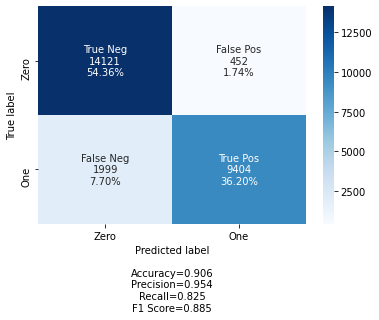

In [71]:
## getting the confusion matrix of the neural network. Initially, it had too many false positives.
## Adjusted the threshold to reduce the number of false positives.

import seaborn as sns
from cf_matrix import make_confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      )

## XGboost model 

Accuracy of the xgboost model = 0.9399060671388975
ROC Area under Curve = 0.9384586734254798
The recall score for XGboost is:  0.9384586734254798
precision score for XGboostis:  0.9394396994444194
f1 score for Xgboost is:  0.9389305812287936


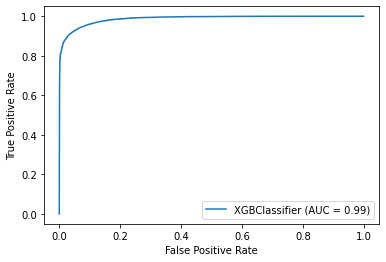

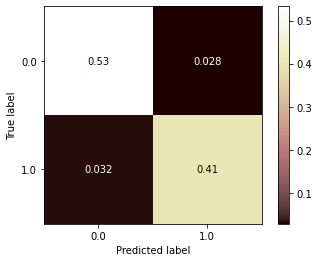

In [72]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    
    print("Accuracy of the xgboost model = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    plot_roc_curve(model, X_test, y_test)   
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    print("The recall score for XGboost is: ", recall_score(y_test, y_pred, average='macro'))
    print("precision score for XGboostis: ",precision_score(y_test, y_pred, average='macro'))
    print("f1 score for Xgboost is: ", f1_score(y_test, y_pred, average='macro'))
    return model, accuracy, roc_auc
params_xgb ={'n_estimators': 100,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)